- OSMnx that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services

- Networkx module contains algorithms that can be used to calculate shortest paths along road networks using e.g. Dijkstra’s or A* algorithm.

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt

 - In this tutorial, we will learn how to download and visualize the street network and additional data from OpenStreetMap covering a specified area of interest.

# Street network¶
The osmnx.graph -module enables downloading and constructing a routable road network graph based on user-defined area of interest. The user can specify the area of interest, for example using a placename, a bounding box or a polygon. Here, we will use a placename for fetching data from the Kamppi area in Helsinki, Finland. In the place name query, OSMnx uses the Nominatim Geocoding API.

In [3]:
#specify the name that is used to search for the data, should exist in the openstreet map geodatabase
#(you can do a test search at https://www.openstreetmap.org/ or at https://nominatim.openstreetmap.org/ to verify that the place name is valid).
place_name = "Kamppi, Helsinki, Finland"

In [4]:
#Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

C:\Anaconda\envs\python-gis\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [5]:
#check the data type of the graph
type(graph)

networkx.classes.multidigraph.MultiDiGraph

SMnx has its own function plot_graph() for visualizing graph objects. The function utilizes Matplotlib for visualizing the data, hence as a result it returns a matplotlib figure and axis objects:

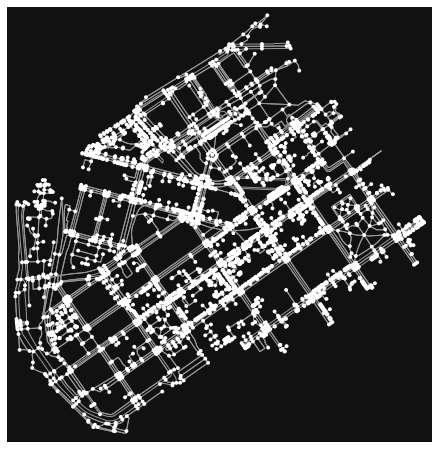

In [6]:
#plot the streets
fig, ax = ox.plot_graph(graph)

- we can see that our graph contains nodes (the points) and edges (the lines) that connects those nodes to each other

# Graph to GeoDataFrame¶
We can now plot all these different OSM layers by using the familiar plot() function of geopandas. As you might remember, the street network data is not a GeoDataFrame, but a graph object. 

Luckily, OSMnx provides a convenient function graph_to_gdfs() that can convert the graph into two separate GeoDataFrames:
- where the first one contains the information about the nodes and 
- the second one about the edge.

In [7]:
#retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

In [8]:
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
25216594,60.164794,24.921057,5,NaN,NaN,POINT (24.92106 60.16479)
25238874,60.163665,24.921028,4,NaN,NaN,POINT (24.92103 60.16366)
25238883,60.163452,24.921441,4,crossing,NaN,POINT (24.92144 60.16345)
25238933,60.161114,24.924529,3,NaN,NaN,POINT (24.92453 60.16111)
25238937,60.160860,24.925861,3,NaN,NaN,POINT (24.92586 60.16086)


In [9]:
edges.head()

osmid  oneway lanes            name   highway  \
u        v          key                                                      
25216594 1372425721 0     23717777    True     2   Porkkalankatu   primary   
         1372425714 0     23856784    True     2  Mechelininkatu   primary   
25238874 336192701  0     29977177    True     3  Mechelininkatu   primary   
         1519889266 0    930820886    True     1    Itämerenkatu  tertiary   
25238883 568147264  0     58077048    True     4  Mechelininkatu   primary   

                        maxspeed  length  \
u        v          key                    
25216594 1372425721 0         40  10.404   
         1372425714 0         40  40.885   
25238874 336192701  0         40   5.843   
         1519889266 0         30  10.879   
25238883 568147264  0         40  15.388   

                                                                  geometry  \
u        v          key                                                      
25216594 1372425721 0    LINESTRING (24.92106 60.16479, 24.92087 60.16479)   
         1372425714 0    LINESTRING (24.92106 60.16479, 24.92095 60.164...   
25238874 336192701  0    LINESTRING (24.92103 60.16366, 24.92104 60.16361)   
         1519889266 0    LINESTRING (24.92103 60.16366, 24.92083 60.16366)   
25238883 568147264  0    LINESTRING (24.92144 60.16345, 24.92140 60.16359)   

                        junction tunnel access bridge service  ref  
u        v          key                                             
25216594 1372425721 0        NaN    NaN    NaN    NaN     NaN  NaN  
         1372425714 0        NaN    NaN    NaN    NaN     NaN  NaN  
25238874 336192701  0        NaN    NaN    NaN    NaN     NaN  NaN  
         1519889266 0        NaN    NaN    NaN    NaN     NaN  NaN  
25238883 568147264  0        NaN    NaN    NaN    NaN     NaN  NaN

- we have our graph as GeoDataFrames and we can plot them using the same functions and tools as we have used before.

# Place polygon

- plot the Polygon that represents our area of interest (Kamppi, Helsinki). We can retrieve the Polygon geometry using the [geocode_to_gdf()]


In [10]:
#get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

C:\Anaconda\envs\python-gis\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


- returns a GeoDataFrame object based on the specified place name query.

In [11]:
#check the datatype
type(area)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

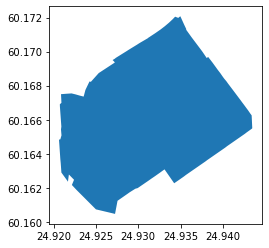

In [12]:
#check the data values 
area.plot()

# Building footprints
- For retrieving other types of OSM data features with OSMnx such as buildings or points of interest (POIs), use [ ox.geometries_from_place() ]

Let’s download the buildings with OSMnx geometries_from_place() -function and plot them on top of our street network in Kamppi.

In [17]:
#specify the correct tags, to grab all buildings specify 'True'
tags= {'building':True}

In [18]:
buildings = ox.geometries_from_place(place_name, tags)

C:\Anaconda\envs\python-gis\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


Check the number of buildings returned

In [19]:
len(buildings)

438

In [20]:
buildings.head()

amenity          operator wheelchair  \
element_type osmid                                           
way          8035238      NaN               NaN        NaN   
             8042297      NaN               NaN        NaN   
             14797170     NaN  City of Helsinki        NaN   
             14797171     NaN               NaN        NaN   
             14797172     NaN               NaN        NaN   

                                                                geometry  \
element_type osmid                                                         
way          8035238   POLYGON ((24.93563 60.17045, 24.93557 60.17054...   
             8042297   POLYGON ((24.92938 60.16795, 24.92933 60.16797...   
             14797170  POLYGON ((24.92427 60.16648, 24.92427 60.16650...   
             14797171  POLYGON ((24.92390 60.16729, 24.92391 60.16731...   
             14797172  POLYGON ((24.92647 60.16689, 24.92648 60.16689...   

                       source access addr:housenumber      addr:street  \
element_type osmid                                                       
way          8035238      NaN    NaN            22-24  Mannerheimintie   
             8042297      NaN    NaN                2   Runeberginkatu   
             14797170  survey    NaN               10  Lapinlahdenkatu   
             14797171  survey    NaN              NaN              NaN   
             14797172  survey    NaN              NaN              NaN   

                      addr:unit  ref  ... lippakioski takeaway  \
element_type osmid                    ...                        
way          8035238        NaN  NaN  ...         NaN      NaN   
             8042297        NaN  NaN  ...         NaN      NaN   
             14797170       NaN  NaN  ...         NaN      NaN   
             14797171       NaN  NaN  ...         NaN      NaN   
             14797172       NaN  NaN  ...         NaN      NaN   

                      outdoor_seating addr:floor covered area ways type  \
element_type osmid                                                        
way          8035238              NaN        NaN     NaN  NaN  NaN  NaN   
             8042297              NaN        NaN     NaN  NaN  NaN  NaN   
             14797170             NaN        NaN     NaN  NaN  NaN  NaN   
             14797171             NaN        NaN     NaN  NaN  NaN  NaN   
             14797172             NaN        NaN     NaN  NaN  NaN  NaN   

                      electrified nohousenumber  
element_type osmid                               
way          8035238          NaN           NaN  
             8042297          NaN           NaN  
             14797170         NaN           NaN  
             14797171         NaN           NaN  
             14797172         NaN           NaN  

[5 rows x 102 columns]

- there are several columns in the buildings-layer. Each column contains information about a spesific tag that OpenStreetMap contributors have added. Each tag consists of a key (the column name), and several potential values (for example building=yes or building=school).

In [21]:
buildings.columns

Index(['amenity', 'operator', 'wheelchair', 'geometry', 'source', 'access',
       'addr:housenumber', 'addr:street', 'addr:unit', 'ref',
       ...
       'lippakioski', 'takeaway', 'outdoor_seating', 'addr:floor', 'covered',
       'area', 'ways', 'type', 'electrified', 'nohousenumber'],
      dtype='object', length=102)

# Points-of-interest

It is also possible to retrieve other types of geometries from OSM using the geometries_from_place by passing different tags. 
- Point-of-interest (POI) is a generic concept that describes point locations that represent places of interest.

In OpenStreetMap, many POIs are described using the amenity-tags. 
- We can, for excample, retrieve all restaurat locations by referring to the tag amenity=restaurant.

In [22]:
# retrieve restaurants that located in our area of interest
tags = { 'amenity': 'restaurant' }

In [23]:
#retrieve restaurants
restaurants = ox.geometries_from_place(place_name, tags)

#how many restaurants do we have?
len(restaurants)

C:\Anaconda\envs\python-gis\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


166

In [24]:
#explore attributes in our restaurants GeoDataFrame
restaurants.columns.values

array(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'amenity', 'cuisine', 'diet:halal', 'diet:kosher',
       'name', 'phone', 'website', 'wheelchair', 'geometry',
       'toilets:wheelchair', 'opening_hours', 'delivery:covid19',
       'opening_hours:covid19', 'takeaway:covid19', 'diet:vegetarian',
       'name:fi', 'name:zh', 'short_name', 'description', 'diet:vegan',
       'contact:phone', 'contact:website', 'source', 'outdoor_seating',
       'check_date:opening_hours', 'addr:housename', 'email', 'level',
       'address', 'access:covid19', 'drive_through:covid19', 'takeaway',
       'delivery', 'url', 'brunch', 'lunch:menu', 'reservation', 'room',
       'opening_hours:brunch', 'toilets', 'capacity', 'smoking',
       'access:dog', 'operator', 'shop', 'alt_name', 'contact:email',
       'established', 'name:sv', 'brand', 'brand:wikidata',
       'brand:wikipedia', 'floor', 'name:en', 'description:en',
       'old_name', 'highchair', 'lun

- subset the columns and inspect the data further. Useful columns include at least name, address information and opening_hours information:

In [26]:
#select some useful cols and print
cols = [ 'name', 'opening_hours', 'addr:city', 'addr:country',
        'addr:housenumber', 'addr:postcode', 'addr:street' ]

#print only selected cols
restaurants[cols].head(10)

name  \
element_type osmid                                 
node         60062502                     Kabuki   
             62965963               Empire Plaza   
             76617692               Johan Ludvig   
             76624339        Ravintola Rivoletto   
             76624351                     Pueblo   
             76627823                     Atabar   
             89074039                Papa Albert   
             151006260           Ravintola China   
             151006483  Tony's deli + Street Bar   
             151006932                Haru Sushi   

                                                            opening_hours  \
element_type osmid                                                          
node         60062502                                                 NaN   
             62965963                                                 NaN   
             76617692                                                 NaN   
             76624339   Mo-Th 11:00-23:00; Fr 11:00-24:00; Sa 15:00-24...   
             76624351                                                 NaN   
             76627823                                                 NaN   
             89074039   Mo-Th 10:00-14:00, 17:30-22:00; Fr 11:00-23:00...   
             151006260       Mo-Fr 11:00-23:00; Sa-Su 12:00-23:00; PH off   
             151006483                                                NaN   
             151006932  Mo-Fr 11:00-21:00; Sa 12:00-21:00; Su 13:00-21:00   

                       addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                             
node         60062502   Helsinki           FI               12         00180   
             62965963        NaN          NaN              NaN           NaN   
             76617692   Helsinki           FI              NaN           NaN   
             76624339   Helsinki           FI               38         00120   
             76624351   Helsinki           FI              NaN           NaN   
             76627823   Helsinki           FI              NaN           NaN   
             89074039   Helsinki           FI               30         00120   
             151006260  Helsinki           FI               25         00100   
             151006483  Helsinki           FI                7         00120   
             151006932  Helsinki           FI               30         00120   

                            addr:street  
element_type osmid                       
node         60062502   Lapinlahdenkatu  
             62965963               NaN  
             76617692               NaN  
             76624339      Albertinkatu  
             76624351       Eerikinkatu  
             76627823       Eerikinkatu  
             89074039      Albertinkatu  
             151006260        Annankatu  
             151006483        Bulevardi  
             151006932    Fredrikinkatu

As we can see, there is a lot of useful information about restaurants that can be retrieved easily with OSMnx. Also, if some of the information need updating, you can go over to www.openstreetmap.org and edit the source data!

# Plotting the data
Lets create a map out of the streets, buildings, restaurants, and the area Polygon but lets exclude the nodes
(to keep the figure clearer)

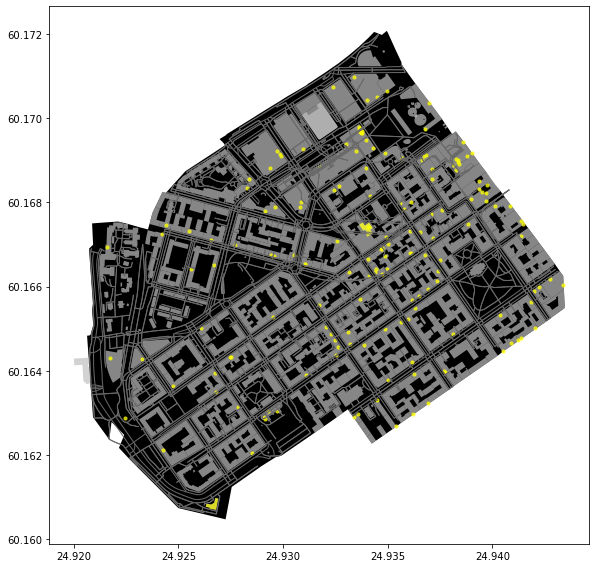

In [27]:
fig, ax = plt.subplots(figsize=(12,8))

#plot the footprint
area.plot(ax=ax, facecolor='black')

#plot the street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

#plot the buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

#plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)

plt.tight_layout()

-  we have a map where we have plotted the restaurants, buildings, streets and the boundaries of the selected region of ‘Kamppi’ in Helsinki.

# Extra: Park polygons¶

Notice that we can retrieve all kinds of different features from OpenStreetMap using the geometries_from_place() method by passing different OpenStreetMap tags.

Let’s try to fetch all public parks in the Kamppi area. 

In OpenStreetMap, 
- parks are often tagged as leisure=park. 
- We can also add other green surfaces, such as landuse=grass. 


In [28]:
tags = {'leisure': 'park', 'landuse':'grass'}

In [29]:
parks = ox.geometries_from_place(place_name, tags)

#check the result
print("Retrieved", len(parks), "objects")

C:\Anaconda\envs\python-gis\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


Retrieved 55 objects


In [30]:
parks.head(3)

geometry  \
element_type osmid                                                         
way          8042256   POLYGON ((24.93566 60.17132, 24.93566 60.17130...   
             8042613   POLYGON ((24.93701 60.16947, 24.93627 60.16919...   
             15218362  POLYGON ((24.92330 60.16499, 24.92323 60.16500...   

                      access  source addr:city  \
element_type osmid                               
way          8042256     NaN     NaN       NaN   
             8042613     NaN     NaN       NaN   
             15218362    NaN  survey       NaN   

                                                                   nodes  \
element_type osmid                                                         
way          8042256   [292719496, 1001543836, 1037987967, 1001544060...   
             8042613   [552965718, 293390264, 295056669, 256264975, 1...   
             15218362  [144181223, 150532964, 150532958, 150532966, 1...   

                      leisure                name             name:fi  \
element_type osmid                                                      
way          8042256     park                 NaN                 NaN   
             8042613     park      Simonpuistikko      Simonpuistikko   
             15218362    park  Työmiehenpuistikko  Työmiehenpuistikko   

                             name:sv hoitoluokitus_viheralue wikidata  \
element_type osmid                                                      
way          8042256             NaN                     NaN      NaN   
             8042613   Simonsskvären                     NaN      NaN   
             15218362  Arbetarparken                      A2      NaN   

                      wikipedia landuse alt_name loc_name  
element_type osmid                                         
way          8042256        NaN     NaN      NaN      NaN  
             8042613        NaN     NaN      NaN      NaN  
             15218362       NaN     NaN      NaN      NaN

In [31]:
#check column headers
parks.columns.values

array(['geometry', 'access', 'source', 'addr:city', 'nodes', 'leisure',
       'name', 'name:fi', 'name:sv', 'hoitoluokitus_viheralue',
       'wikidata', 'wikipedia', 'landuse', 'alt_name', 'loc_name'],
      dtype=object)

<AxesSubplot:>

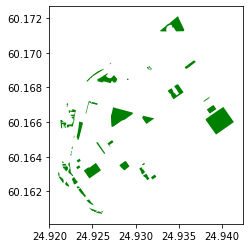

In [32]:
parks.plot(color="green")

# add the parks polygon to our map

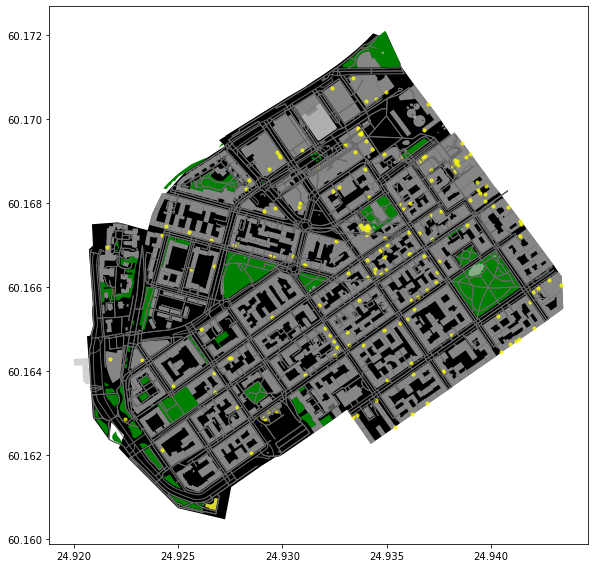

In [33]:
#create a subplot object for plotting the layers onto a common map
fig, ax = plt.subplots(figsize=(12,8))

#plot the footprint
area.plot(ax=ax, facecolor='black')

#plot the parks
parks.plot(ax=ax,facecolor='green')

#plot the street edges
edges.plot(ax=ax, linewidth=1,edgecolor='dimgray')

#plot the buildings
buildings.plot(ax=ax,facecolor='silver', alpha=0.7)

#plot the restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)

plt.tight_layout()

# Check your understading

1. Retrieve OpenStreetMap data from some other area! Download these elements using OSMnx functions from your area of interest:
Extent of the area using geocode_to_gdf()

2. Street network using graph_from_place(), and convert to gdf using graph_to_gdfs()

3. Building footprints (and other geometries) using geometries_from_place() and appropriate tags.

**Note, the larger the area you choose, the longer it takes to retrieve data from the API! Use parameter network_type=drive to limit the graph query to filter out un-driveable roads.**

In [51]:
place_name = "Daly City, California"

#get the graph, so we split into 2 gdf nodes and edges
graph = ox.graph_from_place(place_name)

C:\Anaconda\envs\python-gis\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


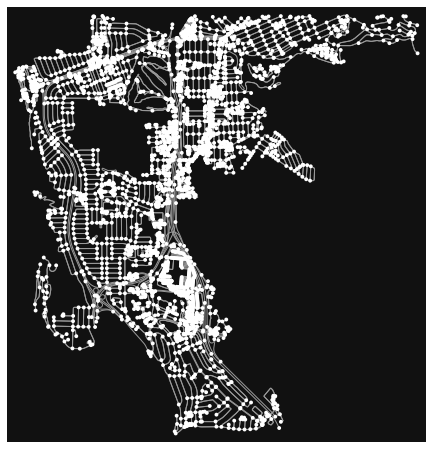

In [52]:
#plot the streets
fig, ax = ox.plot_graph(graph)

In [53]:
#retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

In [54]:
edges.head()

osmid  oneway      lanes  \
u        v          key                                                       
32927534 410833236  0    [394222592, 8922651, 394222590]    True  [1, 2, 3]   
         7231921879 0    [929734336, 35027641, 35026972]    True          4   
32927543 258285526  0                          939364043    True          5   
65329359 4070650106 0                          505677838   False          2   
         65346233   0                          396947462    True          3   

                               highway   length  \
u        v          key                           
32927534 410833236  0    motorway_link  444.210   
         7231921879 0         motorway  607.293   
32927543 258285526  0         motorway  119.376   
65329359 4070650106 0         tertiary   12.674   
         65346233   0        secondary    9.326   

                                                                  geometry  \
u        v          key                                                      
32927534 410833236  0    LINESTRING (-122.46310 37.65943, -122.46331 37...   
         7231921879 0    LINESTRING (-122.46310 37.65943, -122.46346 37...   
32927543 258285526  0    LINESTRING (-122.46777 37.67319, -122.46796 37...   
65329359 4070650106 0    LINESTRING (-122.48568 37.70807, -122.48581 37...   
         65346233   0    LINESTRING (-122.48568 37.70807, -122.48566 37...   

                           ref                    name maxspeed bridge  \
u        v          key                                                  
32927534 410833236  0      NaN                     NaN      NaN    NaN   
         7231921879 0    I 280  Junipero Serra Freeway   65 mph    yes   
32927543 258285526  0    I 280  Junipero Serra Freeway   65 mph    NaN   
65329359 4070650106 0      NaN         John Muir Drive   40 mph    NaN   
         65346233   0      NaN   Lake Merced Boulevard   40 mph    NaN   

                        service access junction tunnel  
u        v          key                                 
32927534 410833236  0       NaN    NaN      NaN    NaN  
         7231921879 0       NaN    NaN      NaN    NaN  
32927543 258285526  0       NaN    NaN      NaN    NaN  
65329359 4070650106 0       NaN    NaN      NaN    NaN  
         65346233   0       NaN    NaN      NaN    NaN

In [55]:
nodes.head()

,y,x,ref,highway,street_count,geometry
osmid,,,,,,
32927534,37.659431,-122.463102,46,motorway_junction,3,POINT (-122.46310 37.65943)
32927543,37.673186,-122.467766,NaN,NaN,3,POINT (-122.46777 37.67319)
32927555,37.699222,-122.471319,49B,motorway_junction,3,POINT (-122.47132 37.69922)
65329359,37.708073,-122.485682,NaN,NaN,3,POINT (-122.48568 37.70807)
65340369,37.708210,-122.434118,NaN,NaN,4,POINT (-122.43412 37.70821)


In [56]:
edges.columns

Index(['osmid', 'oneway', 'lanes', 'highway', 'length', 'geometry', 'ref',
       'name', 'maxspeed', 'bridge', 'service', 'access', 'junction',
       'tunnel'],
      dtype='object')

In [57]:
#get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

C:\Anaconda\envs\python-gis\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


<AxesSubplot:>

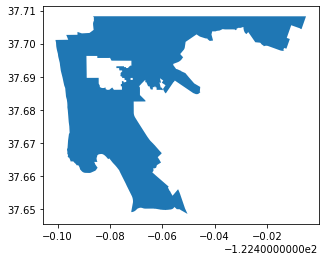

In [58]:
area.plot()

- Grab all schools from Daly City California

In [61]:
# list of tags: https://wiki.openstreetmap.org/wiki/Map_features

school_tags = { 'building': 'school' }
college_tags = {'building' : 'college' }
univ_tags = { 'building' : 'university' }

#retrieve restaurants
schools = ox.geometries_from_place(place_name, school_tags)
print("Number of schools in Daly City: ",  len(schools) )

colleges = ox.geometries_from_place(place_name, college_tags)
print("Number of colleges in Daly City: ", len(colleges) )

university = ox.geometries_from_place(place_name, univ_tags)
print("Number of universities in Daly City: ", len(university) )

C:\Anaconda\envs\python-gis\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


Number of schools in Daly City:  59


C:\Anaconda\envs\python-gis\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


Number of colleges in Daly City:  0


C:\Anaconda\envs\python-gis\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


Number of universities in Daly City:  0


- Grab all libraries in daly city

In [65]:
lib_tags = { 'amenity' : 'library' }
libraries = ox.geometries_from_place(place_name, lib_tags)
print("Number of Libraries in Daly City: ", len(libraries) )

C:\Anaconda\envs\python-gis\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


Number of Libraries in Daly City:  3


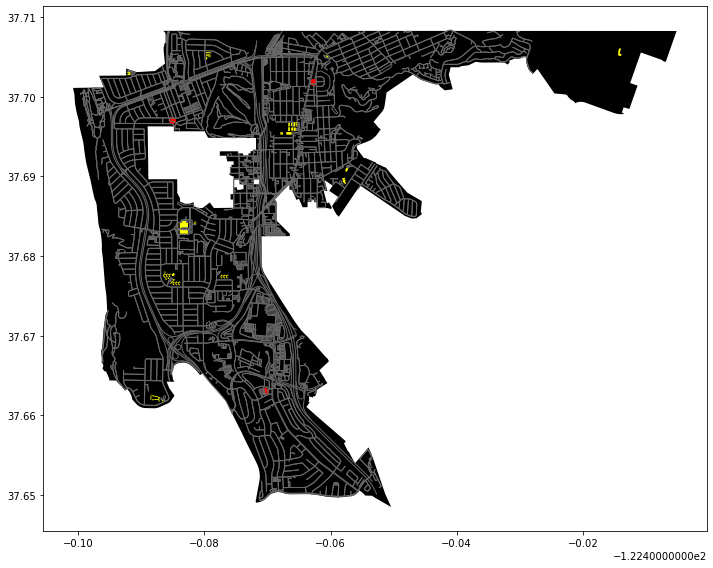

In [69]:
fig, ax = plt.subplots( figsize =(12,8))

#plot the boundary of daly city
area.plot(ax=ax, facecolor='black')

#plot the streets of daly city
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

#plot the schools
schools.plot( ax=ax , facecolor = 'yellow')

#plot the libraries
libraries.plot(ax=ax, facecolor = 'red')

plt.tight_layout()